## Problem statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

They have been able to raise around 10 million dollars and the CEO wants to help the countries that are in the direst need of aid.

We need to categorise the countries using some socio-economic and health factors that determine the overall development of the country and suggest the countries which the CEO needs to focus on the most.

In [1]:
# Importing all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data preparation

In [2]:
# Importing the data

country_data = pd.read_csv(r"C:\Users\dell\Documents\UpGrad\Assignment PCA & Clustering\Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Getting familiar with data

country_data.shape

(167, 10)

In [4]:
# Checking correctness of datatypes of each column

country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Our data looks clean without any null values and also the datatypes are correctly matched.

In [6]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


There is lot of variation in the mean of each column. So we need to scale the data.

___Outlier Analysis: You must perform the Outlier Analysis on the dataset, before or after performing PCA, as per your choice. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.___

## Outlier analysis

In [7]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

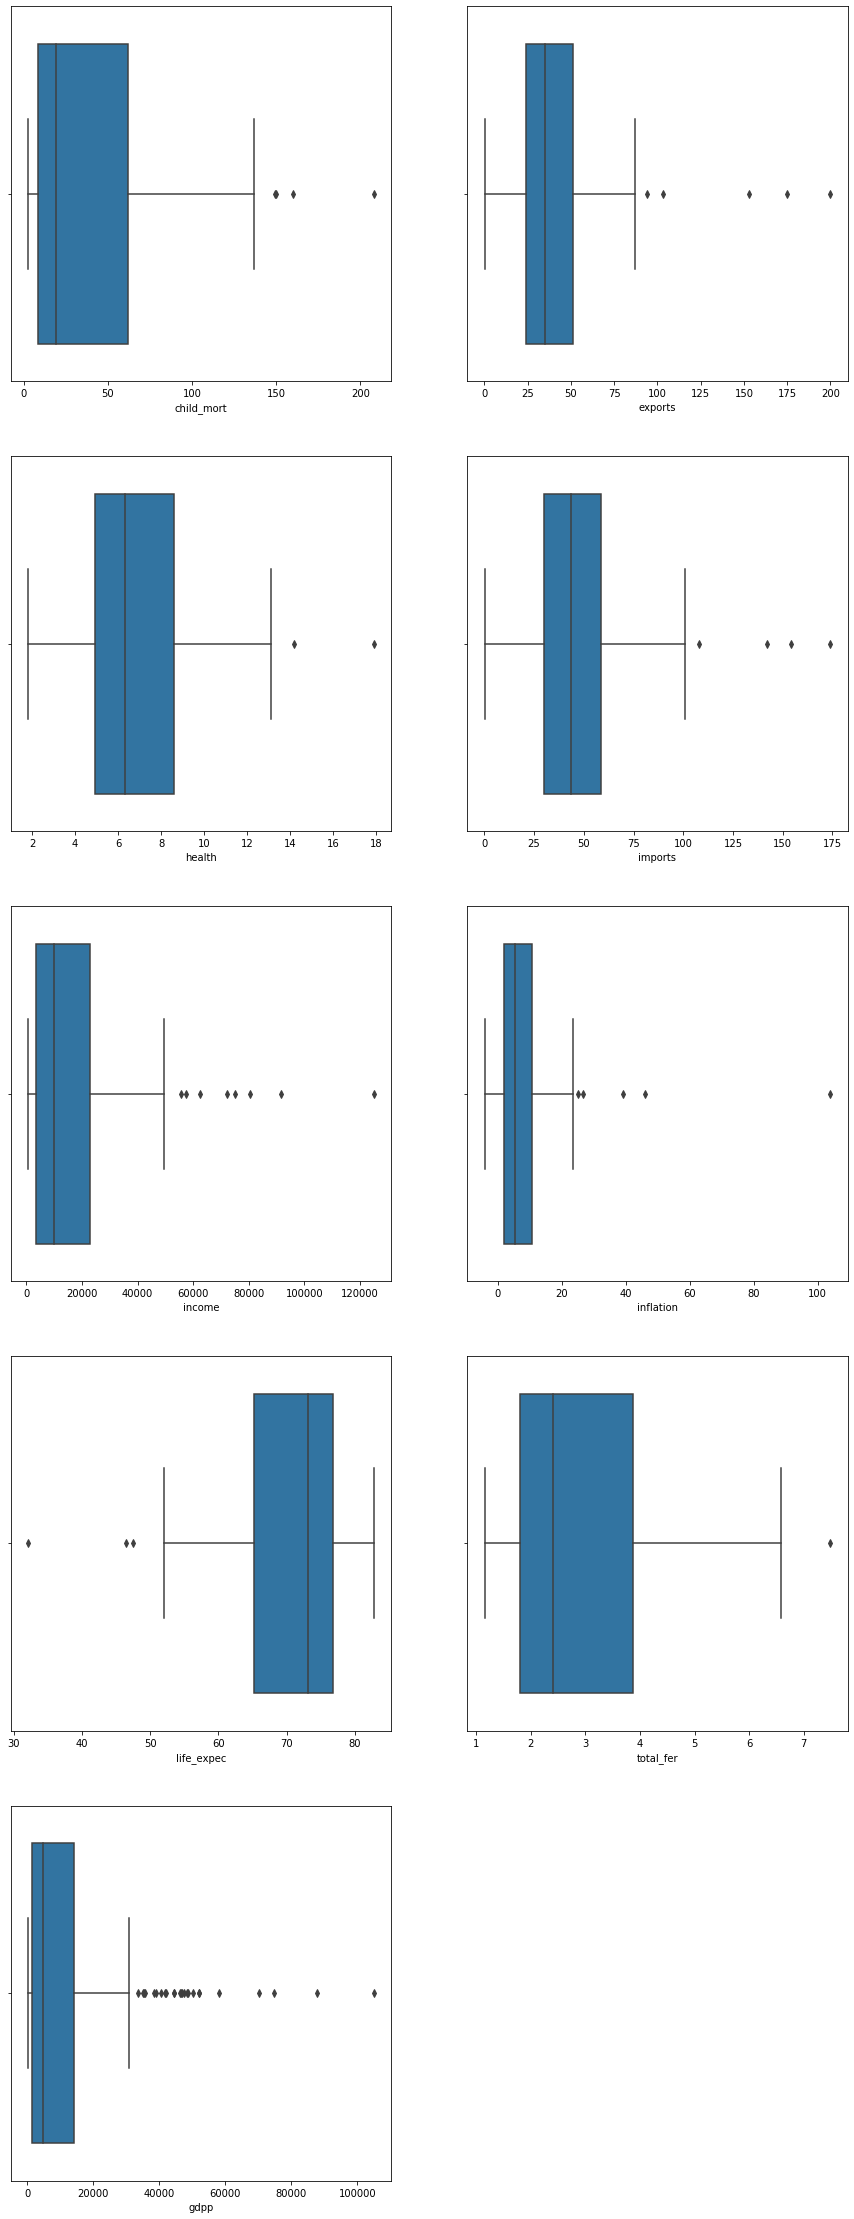

In [8]:
# Visualizing outliers through boxplots

columns = country_data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

plt.figure(figsize = (15,40))

plt.subplot(5,2,1)
sns.boxplot(x = 'child_mort', data = country_data)

plt.subplot(5,2,2)
sns.boxplot(x = 'exports', data = country_data)

plt.subplot(5,2,3)
sns.boxplot(x = 'health', data = country_data)

plt.subplot(5,2,4)
sns.boxplot(x = 'imports', data = country_data)

plt.subplot(5,2,5)
sns.boxplot(x = 'income', data = country_data)

plt.subplot(5,2,6)
sns.boxplot(x = 'inflation', data = country_data)

plt.subplot(5,2,7)
sns.boxplot(x = 'life_expec', data = country_data)

plt.subplot(5,2,8)
sns.boxplot(x = 'total_fer', data = country_data)

plt.subplot(5,2,9)
sns.boxplot(x = 'gdpp', data = country_data)

plt.show

We can find outliers clearly in all the columns. Lets not remove them because we may loose some countries who really need help. Instead, lets cap them by adjusting the quantile range.

## Outlier capping

<function matplotlib.pyplot.show(*args, **kw)>

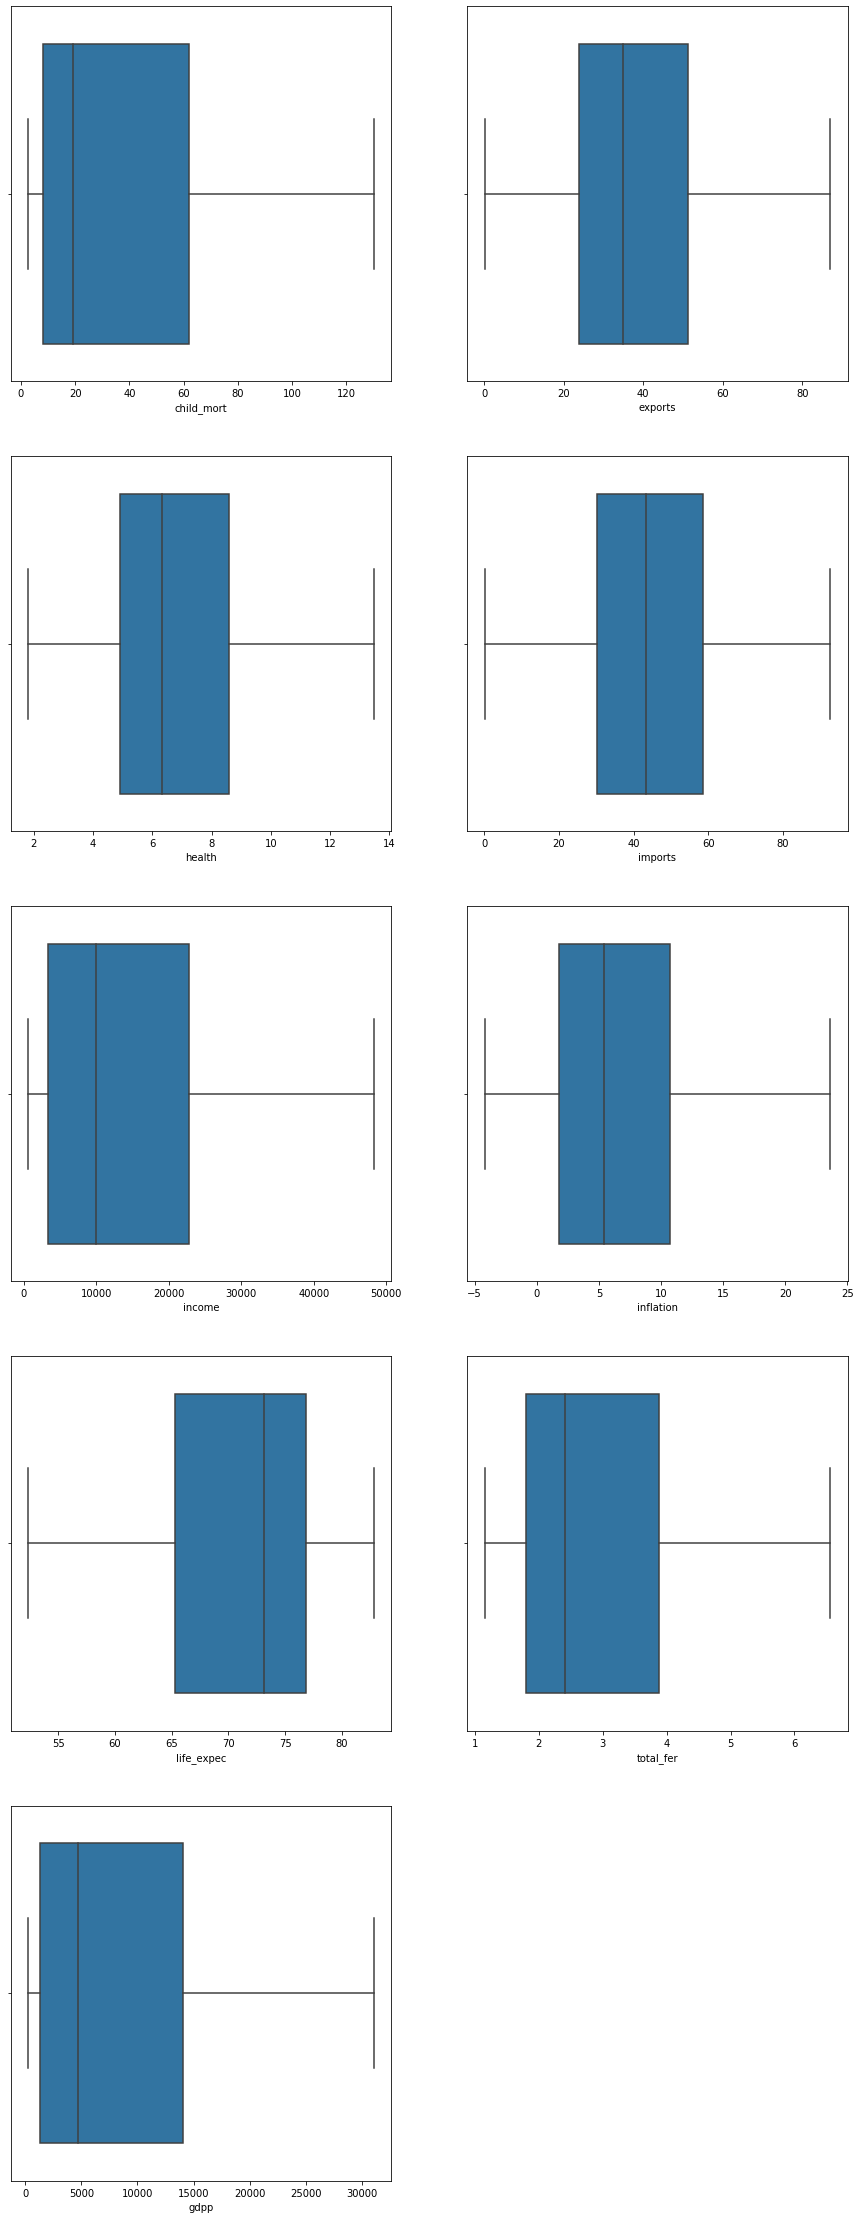

In [9]:
plt.figure(figsize = (15,40))

# Capping its last quartile to 0.97 as we find the outliers in the last quartile

Q4 = country_data['child_mort'].quantile(0.97)
country_data['child_mort'][country_data['child_mort'] >= Q4]=Q4

plt.subplot(5,2,1)
sns.boxplot(x = 'child_mort', data = country_data)

# Capping its last quartile to 0.97 as we find the outliers in the last quartile

Q4 = country_data['exports'].quantile(0.97)
country_data['exports'][country_data['exports'] >= Q4]=Q4

plt.subplot(5,2,2)
sns.boxplot(x = 'exports', data = country_data)

# Capping its last quartile to 0.99 as we find the outliers in the last quartile

Q4 = country_data['health'].quantile(0.99)
country_data['health'][country_data['health'] >= Q4]=Q4

plt.subplot(5,2,3)
sns.boxplot(x = 'health', data = country_data)

# Capping its last quartile to 0.97 as we find the outliers in the last quartile

Q4 = country_data['imports'].quantile(0.97)
country_data['imports'][country_data['imports'] >= Q4]=Q4

plt.subplot(5,2,4)
sns.boxplot(x = 'imports', data = country_data)

# Capping its last quartile to 0.95 as we find the outliers in the last quartile

Q4 = country_data['income'].quantile(0.95)
country_data['income'][country_data['income'] >= Q4]=Q4

plt.subplot(5,2,5)
sns.boxplot(x = 'income', data = country_data)

# Capping its last quartile to 0.97 as we find the outliers in the last quartile

Q4 = country_data['inflation'].quantile(0.97)
country_data['inflation'][country_data['inflation'] >= Q4]=Q4

plt.subplot(5,2,6)
sns.boxplot(x = 'inflation', data = country_data)

# Capping its first quartile to 0.02 as we find the outliers in the first quartile

Q1 = country_data['life_expec'].quantile(0.02)
country_data['life_expec'][country_data['life_expec'] <= Q1]=Q1

plt.subplot(5,2,7)
sns.boxplot(x = 'life_expec', data = country_data)

# Capping its last quartile to 0.99 as we find the outliers in the last quartile

Q4 = country_data['total_fer'].quantile(0.99)
country_data['total_fer'][country_data['total_fer'] >= Q4]=Q4

plt.subplot(5,2,8)
sns.boxplot(x = 'total_fer', data = country_data)

# Capping its last quartile to 0.85 as we find the outliers in the last quartile

Q4 = country_data['gdpp'].quantile(0.85)
country_data['gdpp'][country_data['gdpp'] >= Q4]=Q4

plt.subplot(5,2,9)
sns.boxplot(x = 'gdpp', data = country_data)

plt.show

Our boxplots look good enough with all the outliers capped accordingly. 

Lets move on to analysis using PCA(Principal Component Analysis). We need to perform PCA to reduce the number of dimensions or features, in our case we have 10 features. Each feature is one dimension and we need to reduce them.

We can just cluster the data but we have a disadvantage with any distance based algorithm like K-means or hierarchical etc. The drawback is, as we increase the number of dimensions, the data points look equidistant from the cluster center. Then K-means will fail to assign the data to its nearest cluster. 

Hence, we need to first perform PCA and then do clustering using Kmeans or hierarchical clustering to find out the top five countries in dire need of help.

## Scaling the data

In [10]:
# Removing the categorical 'country' column and creating another dataframe

data = country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [11]:
# Scaling all the variables using StandardScaler from sklearn library
# Scaling is important to avoid unnecessary skewing of the data towards certain variables containing higher values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca_data = scaler.fit_transform(data)

In [12]:
# Checking the data to confirm if the data is scaled or not

pca_data[:,:]

array([[ 1.41203576, -1.41000592,  0.30123858, ..., -1.75140468,
         1.92639646, -0.86424415],
       [-0.55447234, -0.54599595, -0.08896601, ...,  0.66919923,
        -0.86505432, -0.54223148],
       [-0.26858054, -0.04679019, -0.99060381, ...,  0.69328484,
        -0.03498262, -0.50854624],
       ...,
       [-0.37545598,  1.56602841,  0.02089742, ...,  0.28382946,
        -0.66423052, -0.79532597],
       [ 0.5062664 , -0.44999484, -0.60797601, ..., -0.39056765,
         1.15657191, -0.79532597],
       [ 1.22233185, -0.11399097, -0.33900002, ..., -2.21481183,
         1.64524315, -0.7816698 ]])

___Perform PCA on the dataset and obtain the new dataset with the Principal Components. Choose the appropriate number of components k. You need to perform your clustering activity on this new dataset, i.e. the PCA modified dataset with the k components.___

## Applying PCA on the data

In [13]:
# Import PCA from sklearn library and set the random state

from sklearn.decomposition import PCA
pca_1 = PCA(random_state = 1)

In [14]:
# Fitting pca on our data

pca_1.fit(pca_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
# Checking the components of our data

pca_1.components_

array([[-0.41993471,  0.23744079,  0.16669046,  0.09870752,  0.40973716,
        -0.22348274,  0.42833946, -0.40470425,  0.40578138],
       [ 0.0638987 ,  0.58509924, -0.13623039,  0.74479924, -0.10899602,
        -0.12941181, -0.1537702 ,  0.03726078, -0.16318706],
       [-0.07888903,  0.3317867 , -0.68125317, -0.22119263,  0.17553189,
         0.57104691,  0.09734388, -0.04721581,  0.04528638],
       [ 0.37968928,  0.22523623,  0.335085  , -0.00957027,  0.43894691,
         0.21781378, -0.20582345,  0.44349269,  0.46213077],
       [-0.23169108, -0.00586177,  0.53422949,  0.20681525, -0.14940411,
         0.72372168,  0.08107527, -0.15876911, -0.20058838],
       [ 0.09796911,  0.3554462 ,  0.17896946, -0.37775113,  0.01673946,
        -0.07027721, -0.59143357, -0.57127078, -0.08928039],
       [ 0.1041887 , -0.55413497, -0.23841843,  0.44759208,  0.25390995,
         0.15710897, -0.35898682, -0.37746596,  0.25375492],
       [-0.77052209, -0.03545298, -0.0354119 , -0.02317572,  0

In [16]:
# Checking the variance or the amount of information our 9 features are explaining

pca_1.explained_variance_ratio_

array([0.49318936, 0.16377964, 0.13763064, 0.09333062, 0.06473377,
       0.01926046, 0.01591411, 0.00896491, 0.00319648])

We see that our 
- first component explains 49% of the variance
- second component explains 16% of the variance
- third component explains 13% of the variance<br>
and so on. Lets visualize the same below using a barplot.

<BarContainer object of 9 artists>

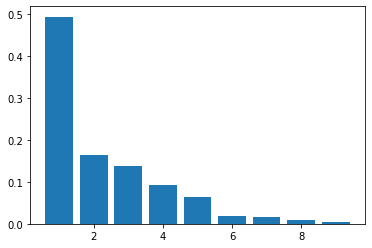

In [17]:
# Lets plot a barplot to visualize the variance explained by each feature

plt.bar(range(1, len(pca_1.explained_variance_ratio_) + 1), pca_1.explained_variance_ratio_)

Looking at the plot, we can figure out that the first 4-5 components give maximum information and lets confirm it using a scree plot.

### Scree plot

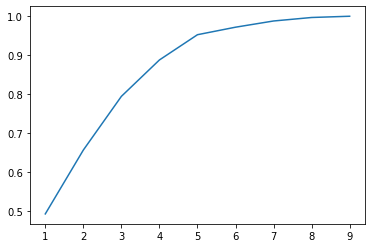

In [18]:
# Finding cumulative sum of our 9 features

cum_sum = np.cumsum(pca_1.explained_variance_ratio_)

plt.plot(range(1, len(cum_sum) + 1), cum_sum)

As seen from the plot, 5 components explain approximately 95% of our data. So lets perform PCA again with these 5 components.

### PCA with 5 components

In [19]:
# Assigning 5 to the number of components and setting the random state

Pca = PCA(n_components = 5, random_state = 1)

In [20]:
# Fit-transforming our data with new Pca

pca_2 = Pca.fit_transform(pca_data)

In [21]:
# Checking the shape of the data to confirm if the new Pca is applied on our data or not

pca_2.shape

(167, 5)

In [22]:
# Making a dataframe to easily access the data

df_1 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_1.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.234674,-0.262448,-1.039839,0.792976,-0.036251
1,0.444806,-0.182747,-0.318292,-1.393581,0.196257
2,-0.413501,-0.629273,1.630903,-0.618564,0.561866
3,-3.368127,1.031611,2.187838,1.733215,0.108075
4,1.286761,0.589911,-0.137119,-0.694970,-0.385639


___Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]___

## Clustering our data

Clustering our data using hopkins statistic. The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words, how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [23]:
# Calculating hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
#Let's check the Hopkins measure of our data

hopkins(df_1)

0.7359068348350369

The hopkins measure of our data is greater than 0.7 which indicates that our data has high tendency to cluster.

### K-means clustering on the PCA modified dataset with the 5 components

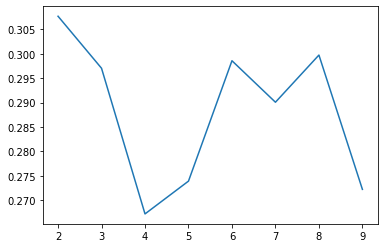

In [25]:
# Plotting silhouette score plot first to identify the optimum number of clusters
# We need to import silhouette_score from sklearn.metrics
# Lets create a variable 'score' to store the silhouette score values for each cluster correspondingly
# I'm assigning the cluster range as 2 to 10.
# Its because we need atleast 2 clusters to startwith and anything greater than 10 would be difficult to analyse

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_score = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, max_iter=50).fit(df_1)
    sil_score.append([i, silhouette_score(df_1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sil_score)[0], pd.DataFrame(sil_score)[1])

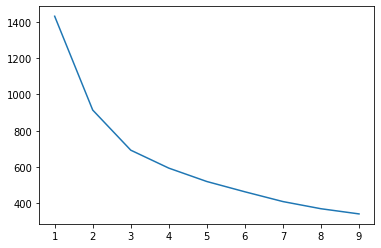

In [26]:
# Similarly, let's perform the elbow curve method

elbow_score = []

for i in list(range(1,10)):
    model = KMeans(n_clusters = i, max_iter = 50).fit(df_1)
    elbow_score.append([i, model.inertia_])
    
plt.plot(pd.DataFrame(elbow_score)[0], pd.DataFrame(elbow_score)[1])

From the elbow curve we can finalize our cluster number to 3. We can find an elbow at 2 clusters too but, taking two clusters will not give good classification so lets proceed with 3 clusters.

In [27]:
# Now lets perform K-means clustering using 3 clusters

cluster_model = KMeans(n_clusters = 3, max_iter = 50, random_state = 1)
cluster_model.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [28]:
# Let's add the cluster Ids to our dataframe

df_2 = pd.concat([df_1, pd.Series(cluster_model.labels_), country_data['country']], axis = 1)
df_2.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'ClusterID', 'country']
df_2.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,country
0,-3.234674,-0.262448,-1.039839,0.792976,-0.036251,0,Afghanistan
1,0.444806,-0.182747,-0.318292,-1.393581,0.196257,1,Albania
2,-0.413501,-0.629273,1.630903,-0.618564,0.561866,1,Algeria
3,-3.368127,1.031611,2.187838,1.733215,0.108075,0,Angola
4,1.286761,0.589911,-0.137119,-0.694970,-0.385639,1,Antigua and Barbuda


In [29]:
# Checking the count of observation per cluster

df_2['ClusterID'].value_counts()

1    79
0    47
2    41
Name: ClusterID, dtype: int64

___You need to perform visualisations on the clusters that have been formed. You can do this by choosing the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters.___

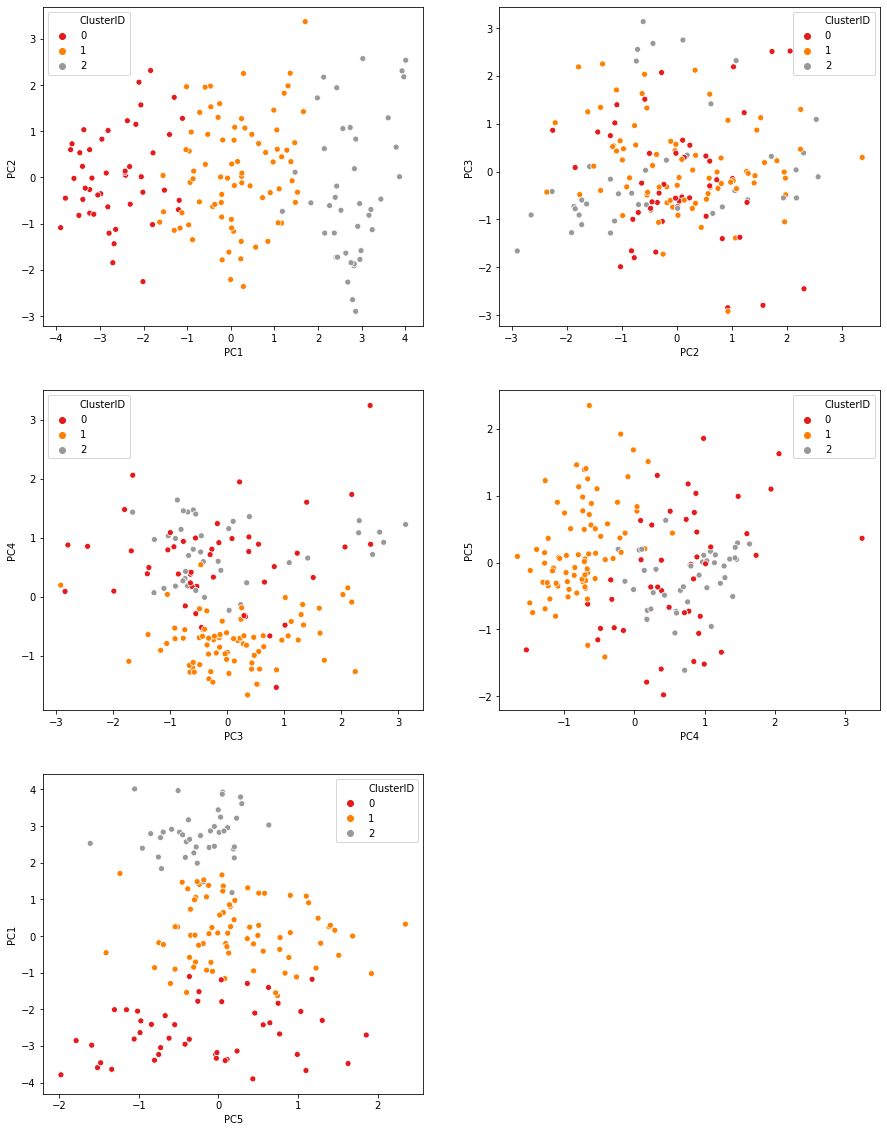

In [30]:
# Visualising the clustered components with respect to the clusters obtained

plt.figure(figsize = (15,20))

# Scatterplot for PC1 and PC2

plt.subplot(3,2,1)
sns.scatterplot(x = 'PC1', y = 'PC2', hue ='ClusterID', legend = 'full', data = df_2, palette='Set1')

# Scatterplot for PC2 and PC3

plt.subplot(3,2,2)
sns.scatterplot(x = 'PC2', y = 'PC3', hue ='ClusterID', legend = 'full', data = df_2, palette='Set1')

# Scatterplot for PC3 and PC4

plt.subplot(3,2,3)
sns.scatterplot(x = 'PC3', y = 'PC4', hue ='ClusterID', legend = 'full', data = df_2, palette='Set1')

# Scatterplot for PC4 and PC5

plt.subplot(3,2,4)
sns.scatterplot(x = 'PC4', y = 'PC5', hue ='ClusterID', legend = 'full', data = df_2, palette='Set1')

# Scatterplot for PC5 and PC1

plt.subplot(3,2,5)
sns.scatterplot(x = 'PC5', y = 'PC1', hue ='ClusterID', legend = 'full', data = df_2, palette='Set1')

### Cluster profiling for K-means clustered data

In [31]:
# Let's merge the original data with our cluster ID dataframe

df_3 = pd.merge(country_data, df_2, how = 'inner', on = 'country')
df_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,-3.234674,-0.262448,-1.039839,0.792976,-0.036251,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.444806,-0.182747,-0.318292,-1.393581,0.196257,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,-0.413501,-0.629273,1.630903,-0.618564,0.561866,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,-3.368127,1.031611,2.187838,1.733215,0.108075,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.286761,0.589911,-0.137119,-0.694970,-0.385639,1


In [32]:
# Let's drop PC's from our dataframe

df_3.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], axis=1 , inplace = True)
df_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


___You should visualize using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc.___

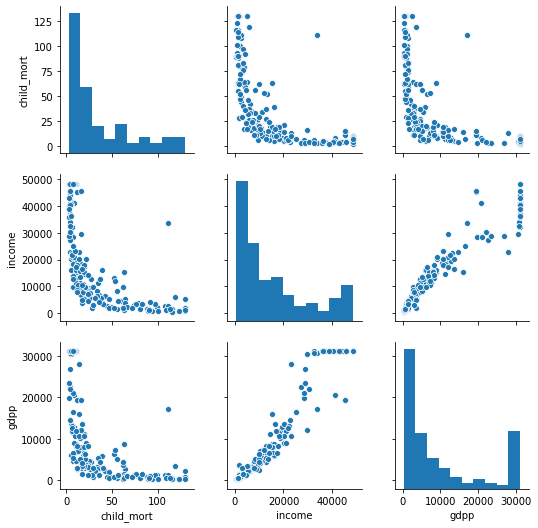

In [33]:
# Visualizing numeric variables 'child_mort', 'income', 'gdpp' using pair plot

pair_plot_data = df_3[['child_mort', 'income', 'gdpp']]
sns.pairplot(pair_plot_data)

From the above pair plot, some insights we can draw are:
1. Child mortality is decreasing with increase in income and GDP percapita which is evident from the parabolic curve for both income and gdpp.
2. Income decreases with increase in child mortality. Income increases with increase in GDP percapita. This indicates an inverse and direct proportionality between 'income - child mortality' and 'income - gdpp' respectively.
3. Similarly, as gdpp increases, child mortality decreases and income increases.

___Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort, income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries. Note that you perform clustering on the PCA modified dataset and the clusters that are formed are being analysed now using the original variables to identify the countries which you finally want to select.___

### Analysis of countries using K-means clusters

In [34]:
# Lets analyse the data by grouping under ClusterID 

df_3.groupby('ClusterID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,89.953191,28.225936,6.253830,41.058168,3738.574468,10.181340,60.059745,4.977813,1808.297872
1,22.510127,39.367316,6.306000,47.603392,11198.101266,7.164949,72.546835,2.324177,5771.189873
2,5.651220,52.169561,8.316195,46.953756,38244.146341,3.235171,79.514634,1.799756,27725.609756


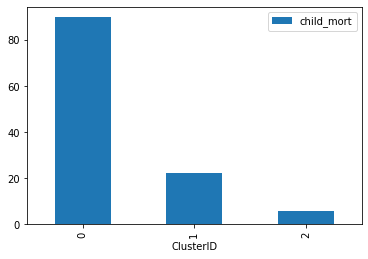

In [35]:
# Lets visualize the above using a barplot
# We are asked to analyse the clusters by comparing these three variables - 'gdpp','child_mort','income'

df_3[['child_mort','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

As seen from the barplot:
1. Cluster 0 shows countries with high child mortality which indicates high death's of children under 5 years of age per 1000 live births
2. Cluster 1 shows countries with comparatively less child mortality which indicates moderate death's of children under 5 years of age per 1000 live births
3. Cluster 2 has countries with very less child mortality rates which indicates very few death's of children under 5 years of age per 1000 live births

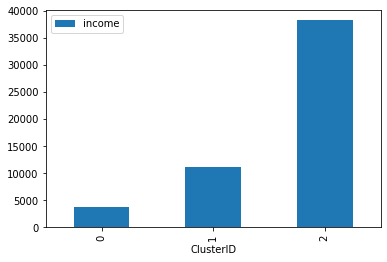

In [36]:
df_3[['income','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

As seen from the barplot:
1. Cluster 0 shows countries with very low net income per person
2. Cluster 1 shows countries with moderate net income per person 
3. Cluster 2 has countries with very high net income per person 

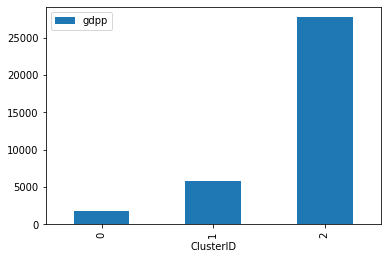

In [37]:
df_3[['gdpp','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

As seen from the barplot:
1. Cluster 0 shows countries with very low per capita GDP
2. Cluster 1 shows countries with moderate per capita GDP
3. Cluster 2 has countries with very high per capita GDP

So, from our analysis using K-means clustering, we can conclude that the countries lying in cluster 0 are in dire need of aid. This is because:
- All the three variables - 'child mortality', 'income' and 'gdp percapita' are interlinked with each other.
- Those countries with low gross domestic product will have very low percapita gdp resulting in low income per person.
- People with low income will have less money to purchase nutritious food. So, the mother and child are prone to risk of death.

Lets identify the top 10 countries belonging to cluster 0 obtained using K-means clustering

In [38]:
# Let's find list of countries belonging to cluster 0

df_3[df_3['ClusterID']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
107     

In [39]:
# Let's sort to identify countries in need belonging to cluster 0

df_3[df_3['ClusterID']==0].sort_values(by=['child_mort', 'income', 'gdpp'], ascending=[False, True, True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
31,Central African Republic,130.14,11.800,3.98,26.5000,888.0,2.010,52.352,5.2100,446.0,0
132,Sierra Leone,130.14,16.800,13.10,34.5000,1220.0,17.200,55.000,5.2000,399.0,0
66,Haiti,130.14,15.300,6.91,64.7000,1500.0,5.450,52.352,3.3300,662.0,0
97,Mali,130.14,22.800,4.98,35.1000,1870.0,4.370,59.500,6.5500,708.0,0
32,Chad,130.14,36.800,4.53,43.5000,1930.0,6.390,56.500,6.5636,897.0,0
113,Nigeria,130.00,25.300,5.07,17.4000,5150.0,23.626,60.500,5.8400,2330.0,0
112,Niger,123.00,22.200,5.16,49.1000,814.0,2.550,58.800,6.5636,348.0,0
3,Angola,119.00,62.300,2.85,42.9000,5900.0,22.400,60.100,6.1600,3530.0,0
37,"Congo, Dem. Rep.",116.00,41.100,7.91,49.6000,609.0,20.800,57.500,6.5400,334.0,0
25,Burkina Faso,116.00,19.200,6.74,29.6000,1430.0,6.810,57.900,5.8700,575.0,0


So from our analysis using K-means clustering, the following ten countries are in high risk and need more help:
1. Central African Republic	
2. Sierra Leone
3. Haiti
4. Mali
5. Chad
6. Nigeria
7. Niger
8. Angola
9. Democratic Republic of Congo(DRC)
10. Burkina Faso

These countries have high child mortality rates(between 115-130), low GDP percapita and comparatively low net income per person. 

Although some countries like 'Eritrea', 'Madagascar', 'Rwanda' have very low GDP percapita(between 400-500), they have less child mortality rate(between 55-65).  

### Hierarchical Clustering on the PCA modified dataset with the 5 components

In [40]:
# Lets import the relevant from scipy library

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

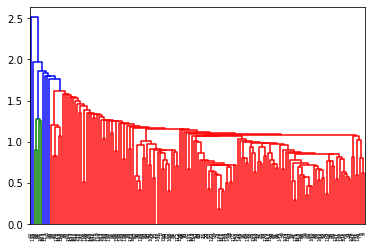

In [41]:
# Lets perform hierarchical single linkage first on the PCA modified dataset, df_1, with the 5 components

single = linkage(df_1, method="single", metric='euclidean')
dendrogram(single)
plt.show()

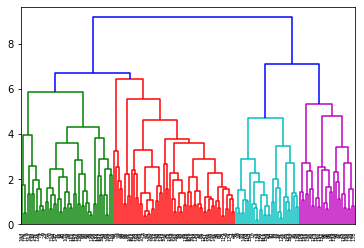

In [42]:
# Lets perform hierarchical complete linkage on the PCA modified dataset, df_1, with the 5 components

complete1 = linkage(df_1, method="complete", metric='euclidean')
dendrogram(complete1)
plt.show()

The complete linkage looks more legible and nice than the single linkage. The difference between them is:
- In Single Linkage, the distance between 2 clusters is defined as the shortest distance between points in the two clusters
- In Complete Linkage, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

- Usually, single linkage type will produce dendrograms which are not structured properly
- Complete linkage will produce clusters which have a proper tree-like structure

From the complete linkage dendrogram, we can observe 4 major groupings from the top blue line. Hence, lets choose 4 clusters and proceed.  

### Cluster profiling and visualization

In [43]:
# Hierarchical clustering with 4 clusters

hierarchy_clusters = cut_tree(complete1, n_clusters = 4).reshape(-1, )
hierarchy_clusters

array([0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 3, 1, 2, 1, 3, 1, 0, 1, 1, 2, 1,
       2, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 3, 3,
       2, 1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 3, 2, 1, 0, 0, 1, 3, 2, 2, 1, 2, 1, 0, 0, 1, 3, 1, 0, 1, 1, 1,
       1, 3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       3, 2, 0, 0, 2, 3, 0, 3, 1, 1, 1, 2, 2, 3, 1, 0, 0, 1, 3, 0, 2, 3,
       0, 3, 3, 3, 1, 0, 3, 2, 0, 1, 0, 1, 2, 3, 1, 0, 3, 0, 0, 1, 1, 2,
       1, 0, 1, 3, 2, 2, 2, 1, 1, 0, 1, 0, 0])

In [44]:
# Let's add the hierarchy_clusters to our new dataframe 

df_4 = pd.concat([df_1, pd.Series(hierarchy_clusters), country_data['country']], axis = 1)
df_4.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'hierarchy_clusters', 'country']
df_4.head()

,PC1,PC2,PC3,PC4,PC5,hierarchy_clusters,country
0,-3.234674,-0.262448,-1.039839,0.792976,-0.036251,0,Afghanistan
1,0.444806,-0.182747,-0.318292,-1.393581,0.196257,1,Albania
2,-0.413501,-0.629273,1.630903,-0.618564,0.561866,0,Algeria
3,-3.368127,1.031611,2.187838,1.733215,0.108075,1,Angola
4,1.286761,0.589911,-0.137119,-0.694970,-0.385639,1,Antigua and Barbuda


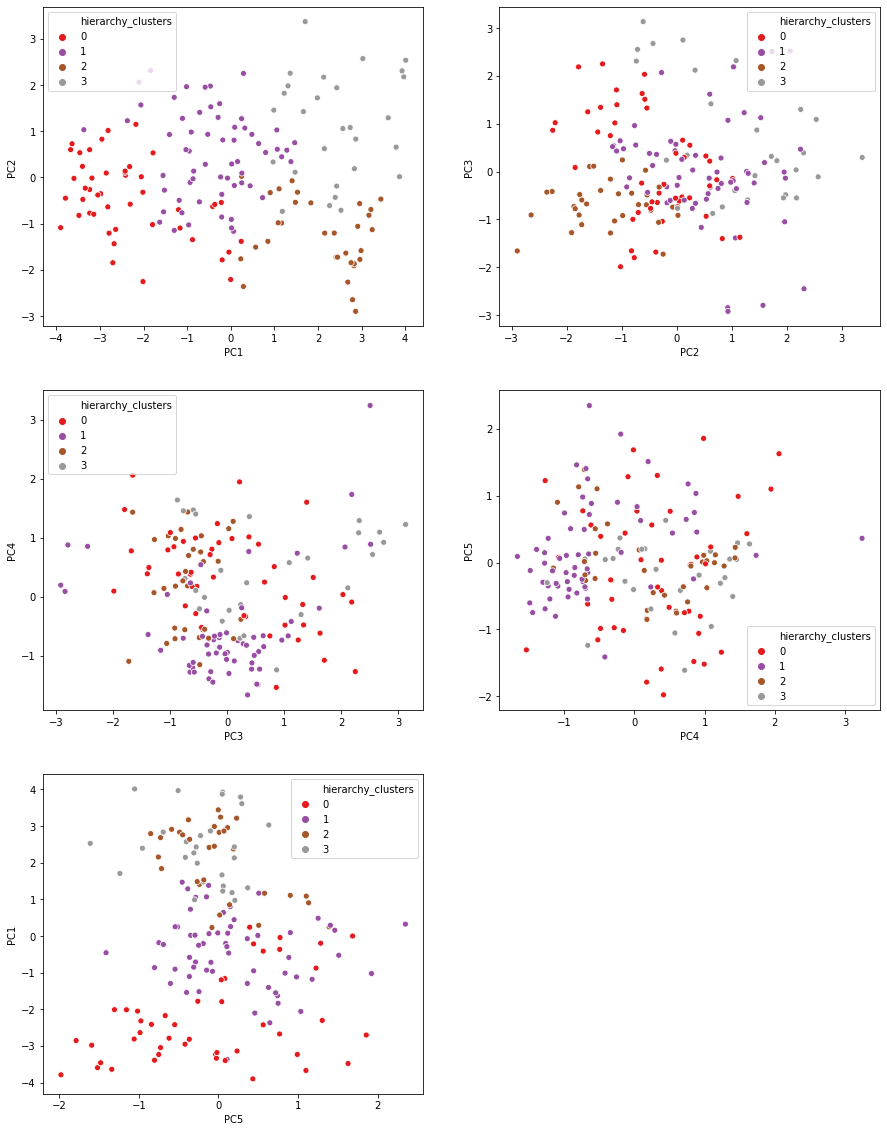

In [45]:
# Visualising the clustered components with respect to the clusters obtained

plt.figure(figsize = (15,20))

# Scatterplot for PC1 and PC2

plt.subplot(3,2,1)
sns.scatterplot(x = 'PC1', y = 'PC2', hue ='hierarchy_clusters', legend = 'full', data = df_4, palette='Set1')

# Scatterplot for PC2 and PC3

plt.subplot(3,2,2)
sns.scatterplot(x = 'PC2', y = 'PC3', hue ='hierarchy_clusters', legend = 'full', data = df_4, palette='Set1')

# Scatterplot for PC3 and PC4

plt.subplot(3,2,3)
sns.scatterplot(x = 'PC3', y = 'PC4', hue ='hierarchy_clusters', legend = 'full', data = df_4, palette='Set1')

# Scatterplot for PC4 and PC5

plt.subplot(3,2,4)
sns.scatterplot(x = 'PC4', y = 'PC5', hue ='hierarchy_clusters', legend = 'full', data = df_4, palette='Set1')

# Scatterplot for PC5 and PC1

plt.subplot(3,2,5)
sns.scatterplot(x = 'PC5', y = 'PC1', hue ='hierarchy_clusters', legend = 'full', data = df_4, palette='Set1')

In [46]:
# Let's merge the original data with our new dataframe

df_5 = pd.merge(country_data, df_4, how = 'inner', on = 'country')
df_5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,hierarchy_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,-3.234674,-0.262448,-1.039839,0.792976,-0.036251,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.444806,-0.182747,-0.318292,-1.393581,0.196257,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,-0.413501,-0.629273,1.630903,-0.618564,0.561866,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,-3.368127,1.031611,2.187838,1.733215,0.108075,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.286761,0.589911,-0.137119,-0.694970,-0.385639,1


In [47]:
# Let's drop PC's from our dataframe

df_5.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], axis=1 , inplace = True)
df_5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hierarchy_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


### Analysis of countries using hierarchical clusters

In [48]:
# Lets analyse the data by grouping under hierarchy_clusters 

df_5.groupby('hierarchy_clusters').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
hierarchy_clusters,,,,,,,,,
0,78.730435,24.083022,5.878696,33.442737,4954.847826,11.024413,62.257739,4.532983,2289.413043
1,35.213115,40.178361,6.218426,53.227344,8550.655738,7.375230,69.546754,2.839508,4182.639344
2,7.456250,31.731250,9.603875,33.531250,28916.562500,2.776156,79.040625,1.796875,22540.000000
3,8.200000,71.481786,6.285714,62.759714,34054.642857,4.690964,77.807143,1.861786,21283.214286


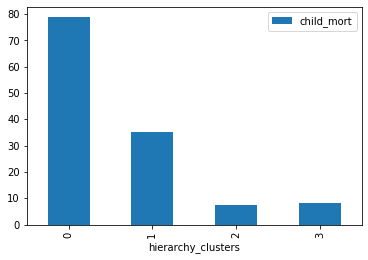

In [49]:
# Lets visualize the above using a barplot
# We are asked to analyse the clusters by comparing these three variables - 'gdpp','child_mort','income'

df_5[['child_mort','hierarchy_clusters']].groupby('hierarchy_clusters').mean().plot(kind = 'bar')

As seen from the barplot:
1. Cluster 0 shows countries with high child mortality which indicates high death's of children under 5 years of age per 1000 live births
2. Cluster 1 shows countries with comparatively less child mortality which indicates moderate death's of children under 5 years of age per 1000 live births
3. Cluster 2 has countries with very less child mortality rates which indicates very few death's of children under 5 years of age per 1000 live births
4. Cluster 3 shows slightly high death's when compared to those countries in cluster 2

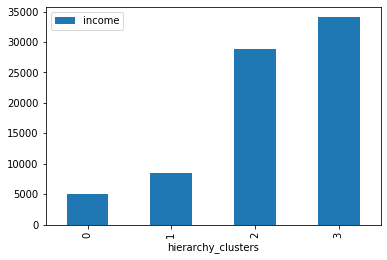

In [50]:
df_5[['income','hierarchy_clusters']].groupby('hierarchy_clusters').mean().plot(kind = 'bar')

As seen from the barplot:
1. Cluster 0 shows countries with very low net income per person which is in sink with high child mortality obtained in the above plot
2. Cluster 1 shows countries with moderate net income per person which is in sink with moderately high child mortality obtained in the above plot
3. Cluster 2 has countries with high net income per person which is in sink with low child mortality obtained in the above plot
4. Cluster 3 has countries with very high net income per person

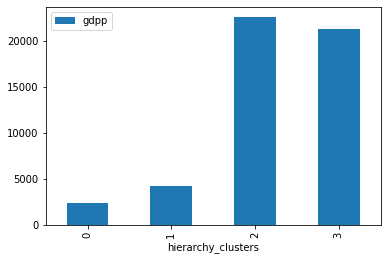

In [51]:
df_5[['gdpp','hierarchy_clusters']].groupby('hierarchy_clusters').mean().plot(kind = 'bar')

As seen from the barplot:
1. Cluster 0 shows countries with very low per capita GDP implying low income per person and high child mortality rates
2. Cluster 1 shows countries with moderate per capita GDP implying slight increase in income per person and slight decrease in child mortality rates respectively
3. Cluster 2 has countries with very high per capita GDP implying high income per person and low child mortality rates
4. Cluster 3 again shows a dip in gdp percapita amounting to the slight increase in child mortality

So, from our analysis using hierarchical clustering, we can conclude that the countries lying in cluster 0 are in dire need of aid. This is because:
- All the three variables - 'child mortality', 'income' and 'gdp percapita' are interlinked with each other.
- Those countries with low gross domestic product will have very low percapita gdp resulting in low income per person.
- People with low income will have less money to purchase nutritious food. So, the mother and child are prone to risk of death.

Lets identify the top 10 countries belonging to cluster 0 obtained using hierarchical clustering

In [52]:
# Let's find list of countries belonging to cluster 0

df_5[df_5['hierarchy_clusters']==0]['country']

0                   Afghanistan
2                       Algeria
5                     Argentina
9                    Azerbaijan
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
70                    Indonesia
71                         Iran
79                   Kazakhstan
80                        Kenya
84                          Lao
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
107                     Myanmar
112                       Niger
113                     Nigeria
116     

In [53]:
# Let's sort to identify countries in need belonging to cluster 0

df_5[df_5['hierarchy_clusters']==0].sort_values(by=['child_mort', 'income', 'gdpp'], ascending=[False, True, True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hierarchy_clusters
31,Central African Republic,130.14,11.800,3.98,26.5000,888.0,2.010,52.352,5.2100,446.0,0
132,Sierra Leone,130.14,16.800,13.10,34.5000,1220.0,17.200,55.000,5.2000,399.0,0
66,Haiti,130.14,15.300,6.91,64.7000,1500.0,5.450,52.352,3.3300,662.0,0
97,Mali,130.14,22.800,4.98,35.1000,1870.0,4.370,59.500,6.5500,708.0,0
32,Chad,130.14,36.800,4.53,43.5000,1930.0,6.390,56.500,6.5636,897.0,0
113,Nigeria,130.00,25.300,5.07,17.4000,5150.0,23.626,60.500,5.8400,2330.0,0
112,Niger,123.00,22.200,5.16,49.1000,814.0,2.550,58.800,6.5636,348.0,0
37,"Congo, Dem. Rep.",116.00,41.100,7.91,49.6000,609.0,20.800,57.500,6.5400,334.0,0
25,Burkina Faso,116.00,19.200,6.74,29.6000,1430.0,6.810,57.900,5.8700,575.0,0
64,Guinea-Bissau,114.00,14.900,8.50,35.2000,1390.0,2.970,55.600,5.0500,547.0,0


So from our analysis using hierarchical clustering, the following ten countries are in high risk and need more help:
1. Central African Republic	
2. Sierra Leone
3. Haiti
4. Mali
5. Chad
6. Nigeria
7. Niger
8. Angola
9. Democratic Republic of Congo(DRC)
10. Burkina Faso

These countries have high child mortality rates(between 115-130), low GDP percapita and comparatively low net income per person.

## Final list of countries

___The final list of countries depends on the number of components that you choose and the number of clusters that you finally form. Also, both K-means and Hierarchical may give different results. Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.___

As seen from the results obtained from K-means and Hierarchical clustering, we can conclude that the following five countries are in dire need of help and the CEO of the NGO can undoubtedly decide to spend their money and help these countries:
1. Central African Republic	
2. Sierra Leone
3. Haiti
4. Mali
5. Chad